In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [3]:
df_train.tail()

,image_id,healthy,multiple_diseases,rust,scab
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0
1820,Train_1820,0,0,0,1


In [4]:
print(df_train["healthy"].unique())
print(df_train["multiple_diseases"].unique())
print(df_train["rust"].unique())
print(df_train["scab"].unique())

[0 1]
[0 1]
[0 1]
[1 0]


In [5]:
import os
base_path = r'C:\Users\DELL\AppData\Local\Programs\Python\Python311\Scripts\Plant\images'
df_train['image_path'] = df_train['image_id'].apply(lambda x: os.path.join(base_path, f'{x}.jpg'))
df_train.to_csv('train_df.csv', index=False)  # Replace with the path where you want to save the updated dataset

In [6]:
df_train = df_train.drop(columns=['image_id'], errors='ignore')

In [7]:
df_train.head()

,healthy,multiple_diseases,rust,scab,image_path
0,0,0,0,1,C:\Users\DELL\AppData\Local\Programs\Python\Py...
1,0,1,0,0,C:\Users\DELL\AppData\Local\Programs\Python\Py...
2,1,0,0,0,C:\Users\DELL\AppData\Local\Programs\Python\Py...
3,0,0,1,0,C:\Users\DELL\AppData\Local\Programs\Python\Py...
4,1,0,0,0,C:\Users\DELL\AppData\Local\Programs\Python\Py...


In [8]:
print(df_train["healthy"].value_counts())
print(df_train["multiple_diseases"].value_counts())
print(df_train["rust"].value_counts())
print(df_train["scab"].value_counts())

0    1305
1     516
Name: healthy, dtype: int64
0    1730
1      91
Name: multiple_diseases, dtype: int64
0    1199
1     622
Name: rust, dtype: int64
0    1229
1     592
Name: scab, dtype: int64


In [9]:
df_train.isna().sum()

healthy              0
multiple_diseases    0
rust                 0
scab                 0
image_path           0
dtype: int64

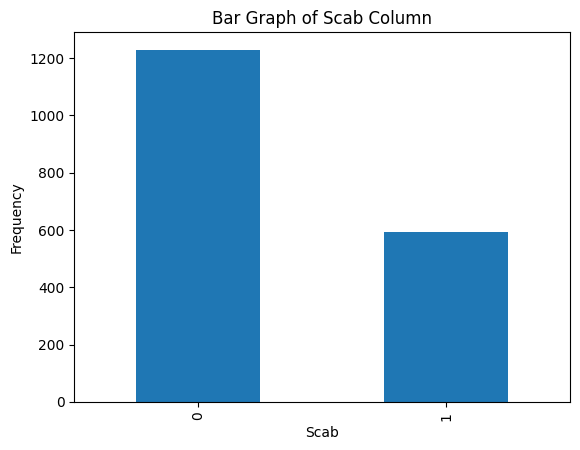

In [10]:
df_train['scab'].value_counts().plot(kind='bar')
plt.xlabel('Scab')
plt.ylabel('Frequency')
plt.title('Bar Graph of Scab Column')
plt.show()

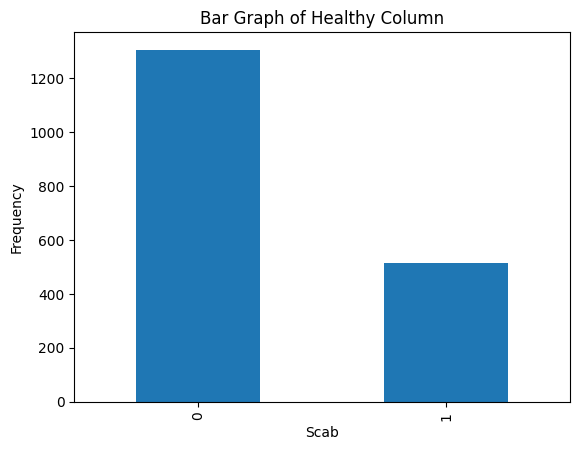

In [11]:
df_train['healthy'].value_counts().plot(kind='bar')
plt.xlabel('Scab')
plt.ylabel('Frequency')
plt.title('Bar Graph of Healthy Column')
plt.show()

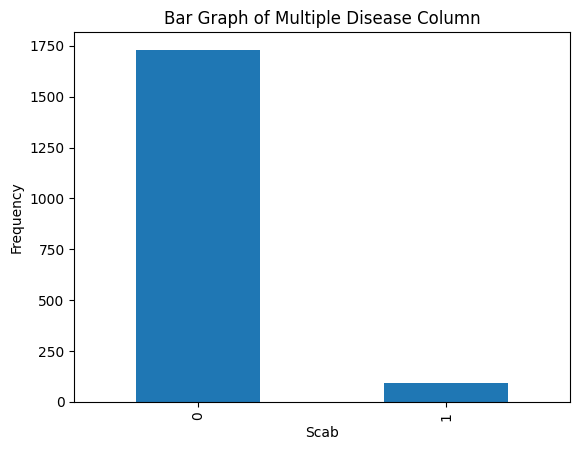

In [12]:
df_train['multiple_diseases'].value_counts().plot(kind='bar')
plt.xlabel('Scab')
plt.ylabel('Frequency')
plt.title('Bar Graph of Multiple Disease Column')
plt.show()

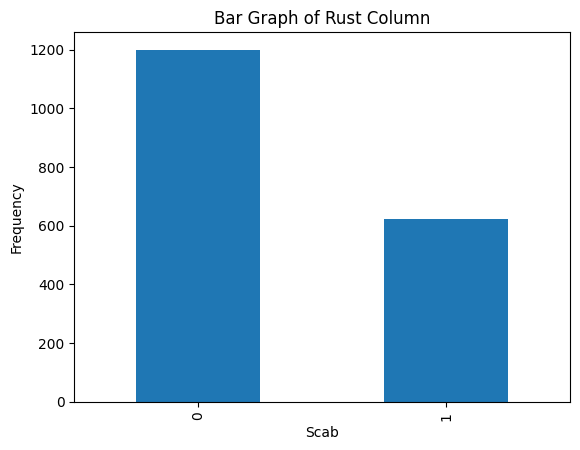

In [13]:
df_train['rust'].value_counts().plot(kind='bar')
plt.xlabel('Scab')
plt.ylabel('Frequency')
plt.title('Bar Graph of Rust Column')
plt.show()

In [14]:
X = df_train[["healthy","multiple_diseases","rust","scab"]]
y = df_train[["image_path"]]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train , X_test, y_train , y_test = train_test_split(X,y,train_size=0.80,random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
res = clf.predict(X_test)

In [18]:
sample = clf.predict([[0,1,0,1]])
sample

array(['C:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python311\\Scripts\\Plant\\images\\Train_231.jpg'],
      dtype=object)

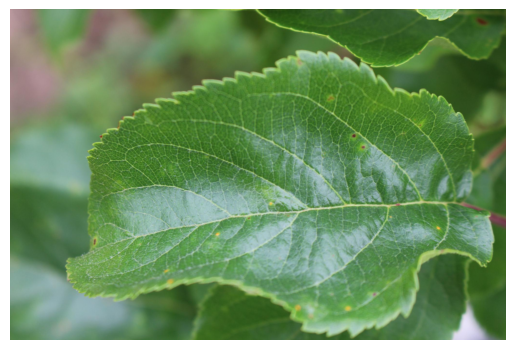

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
# Open an image file
image_path = 'C:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python311\\Scripts\\Plant\\images\\Train_395.jpg'
image = Image.open(image_path)
image.show()
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()